In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [6]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       200 non-null    object
 1   type          200 non-null    object
 2   title         200 non-null    object
 3   director      137 non-null    object
 4   cast          180 non-null    object
 5   country       136 non-null    object
 6   date_added    200 non-null    object
 7   release_year  200 non-null    int64 
 8   rating        200 non-null    object
 9   duration      200 non-null    object
 10  listed_in     200 non-null    object
 11  description   200 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.9+ KB


show_id          0
type             0
title            0
director        63
cast            20
country         64
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [9]:
df['director'] = df['director'].fillna('Not specified')
df['cast'] = df['cast'].fillna('Not specified')
df['country'] = df['country'].fillna('Unknown')

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18212\2944776423.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [11]:
df['date_added'].head(10)

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
5   2021-09-24
6   2021-09-24
7   2021-09-24
8   2021-09-24
9   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       200 non-null    object        
 1   type          200 non-null    object        
 2   title         200 non-null    object        
 3   director      200 non-null    object        
 4   cast          200 non-null    object        
 5   country       200 non-null    object        
 6   date_added    200 non-null    datetime64[ns]
 7   release_year  200 non-null    int64         
 8   rating        200 non-null    object        
 9   duration      200 non-null    object        
 10  listed_in     200 non-null    object        
 11  description   200 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.9+ KB


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

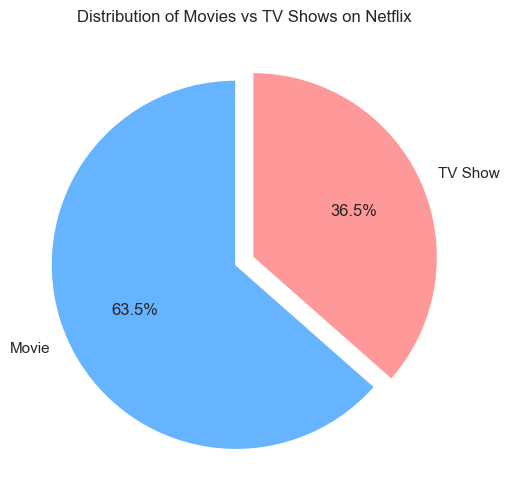

In [13]:
plt.figure(figsize=(6,6))
df['type'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90,
    colors=['#66b3ff','#ff9999'],
    explode=(0.05, 0.05)
)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.ylabel('')
plt.show()

### Distribution of Movies vs TV Shows

This pie chart shows the proportion of content on Netflix that are categorized as Movies versus TV Shows. 
In this dataset, about 63.5% of the titles are Movies, while 36.5% are TV Shows.

In [15]:
df['year_added'] = df['date_added'].dt.year

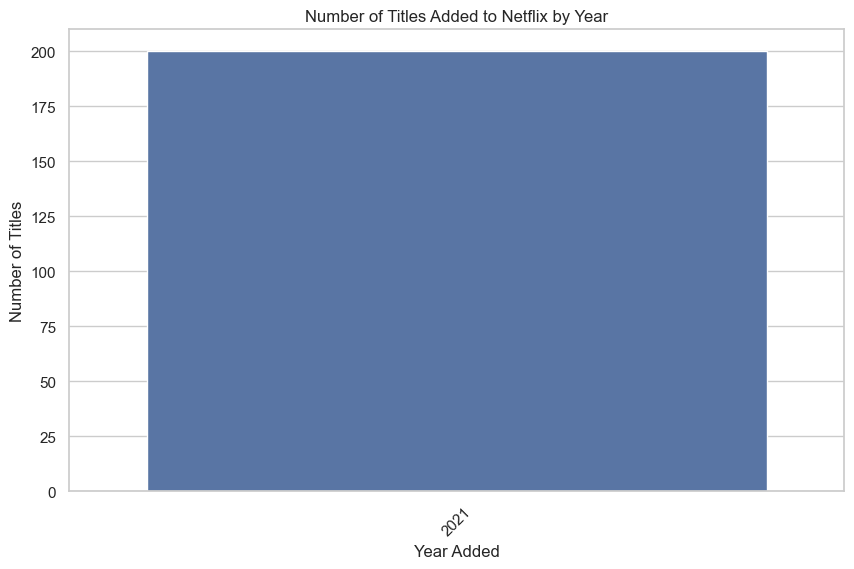

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='year_added',
    data=df,
    order=sorted(df['year_added'].dropna().unique())
)
plt.title('Number of Titles Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### Number of Titles Added to Netflix by Year

This bar chart illustrates the number of titles added to Netflix each year, based on the `date_added` field.
Most titles in this dataset were added in 2021, which suggests the dataset may only include a subset of recent additions.


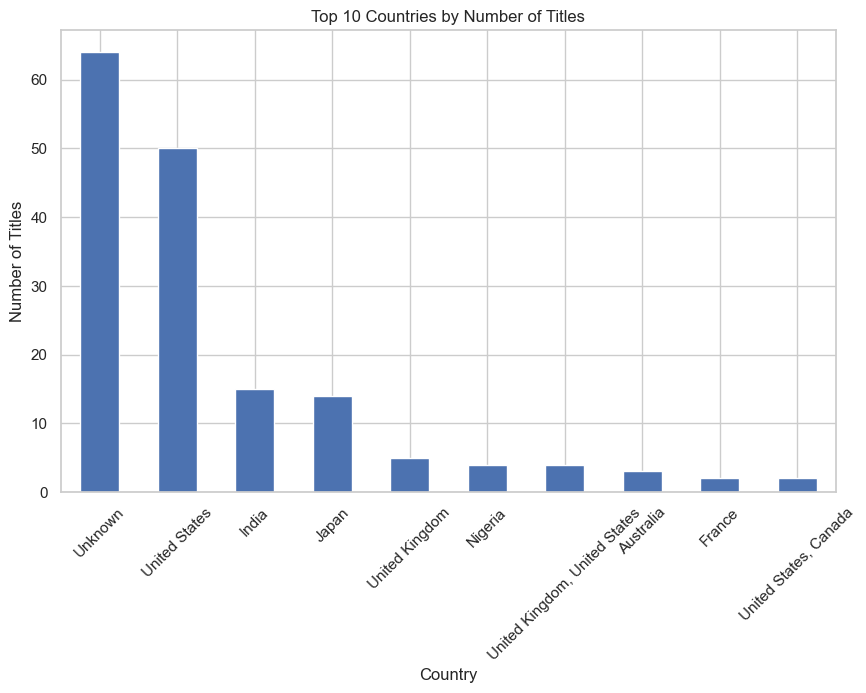

In [17]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


### Top 10 Countries by Number of Titles

This bar chart shows the top 10 countries producing content available on Netflix. 
Most titles in this dataset are from the United States. A large number of entries have missing country information and are labeled as `Unknown`.

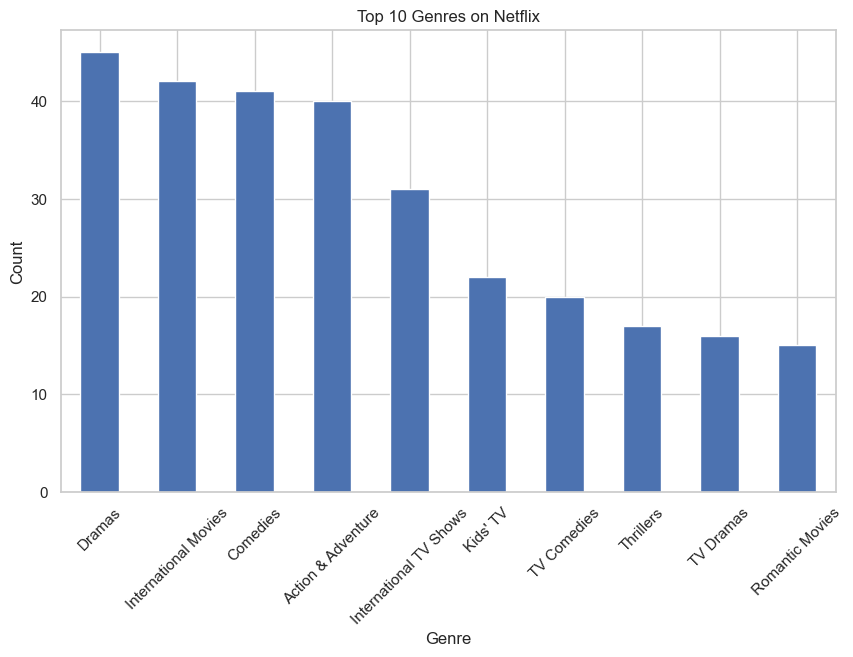

In [19]:
from collections import Counter

#Mengumpulkan semua genre dalam satu list
genres = []
df['listed_in'].dropna().apply(lambda x: genres.extend([i.strip() for i in x.split(',')]))

# mengitung frekuensi genre
genre_counts = Counter(genres)

# Visualisasi 10 genre teratas
plt.figure(figsize=(10,6))
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 10 Most Common Genres

This bar chart shows the most frequently occurring genres in Netflix titles.  
Since titles can belong to multiple genres, each genre was extracted and counted individually.  
From this analysis, `Dramas` emerged as the most common genre on the platform.

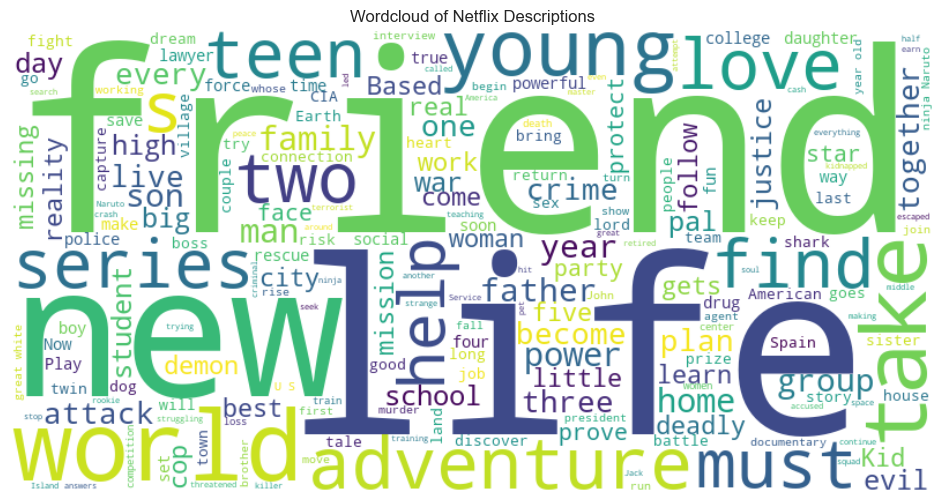

In [20]:
from wordcloud import WordCloud

# Gabungkan semua deskripsi jadi satu string
text = ' '.join(df['description'].dropna())

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Netflix Descriptions')
plt.show()


### Wordcloud of Descriptions

This wordcloud visualizes the most common words found in the `description` field of Netflix titles.  
It provides a quick way to see what kinds of themes and topics appear most often in the catalog.


## Conclusion & Insights

From this analysis of the Netflix titles dataset, several key findings emerge:

- **Content Type**: About 63.5% of the titles are Movies, while 36.5% are TV Shows.  
- **Year Added**: Most titles in this sample were added in 2021, suggesting the dataset focuses on recent additions.  
- **Countries**: Many titles have missing country information (`Unknown`), but among those that are specified, the United States dominates the catalog.  
- **Genres**: `Dramas` are the most prevalent genre, reflecting audience preference for emotional storytelling and complex narratives.  
- **Themes**: Common themes from the descriptions include family, love, friendship, and life challenges, as seen in the wordcloud.

### Recommendations:
- Consider enriching the dataset with complete country information to better understand the global distribution.
- Further analysis could explore ratings, durations, or more granular trends by month or region.

This notebook demonstrates a typical exploratory data analysis (EDA) workflow, producing actionable insights even from a small sample.
